Model Accuracy: 79.93%

Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.93      0.87      1539
        True       0.70      0.46      0.55       574

    accuracy                           0.80      2113
   macro avg       0.76      0.69      0.71      2113
weighted avg       0.79      0.80      0.78      2113



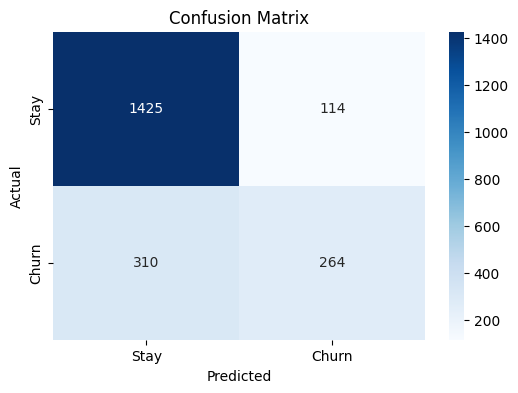

<ipython-input-1-b80507d9dc92>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df.head(10), palette="viridis")


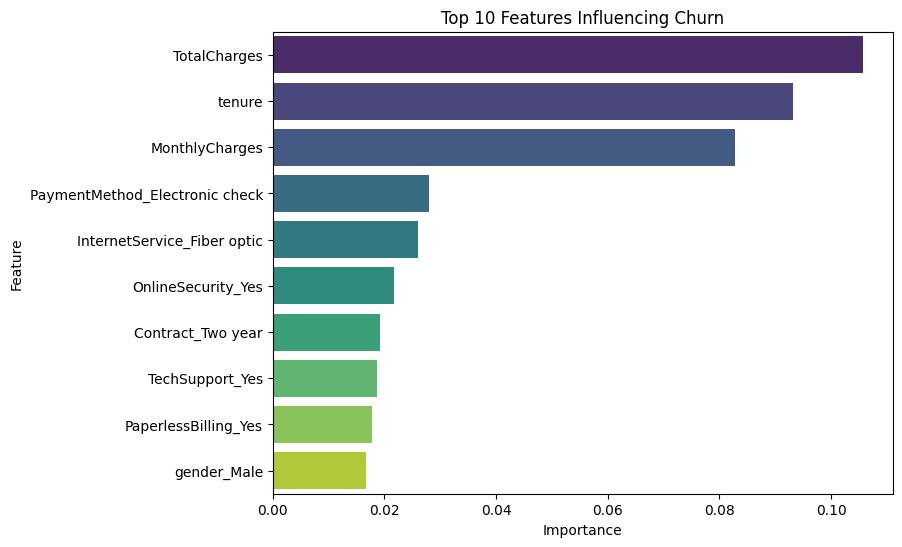


Prediction for a Sample Customer Data:
Likely to churn

Sample Data:
      SeniorCitizen  tenure  MonthlyCharges  TotalCharges  \
185              0       1            24.8          24.8   

     customerID_0003-MKNFE  customerID_0004-TLHLJ  customerID_0011-IGKFF  \
185                  False                  False                  False   

     customerID_0013-EXCHZ  customerID_0013-MHZWF  customerID_0013-SMEOE  ...  \
185                  False                  False                  False  ...   

     StreamingTV_No internet service  StreamingTV_Yes  \
185                            False            False   

     StreamingMovies_No internet service  StreamingMovies_Yes  \
185                                False                False   

     Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
185              False              False                  True   

     PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
185                              

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset (replace with your dataset file if needed)
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
data = pd.read_csv(url)

# Preprocess dataset
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0)
data = pd.get_dummies(data, drop_first=True)  # Convert categorical features to dummy variables
X = data.drop('Churn_Yes', axis=1)
y = data['Churn_Yes']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Stay', 'Churn'], yticklabels=['Stay', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance Plot
feature_importances = model.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(10), palette="viridis")
plt.title("Top 10 Features Influencing Churn")
plt.show()

# Example Prediction on New Data
new_data = X_test.iloc[0:1]  # Taking one sample from the test data
prediction = model.predict(new_data)

print("\nPrediction for a Sample Customer Data:")
print("Likely to churn" if prediction[0] == 1 else "Likely to stay")
print("\nSample Data:\n", new_data)
